In [1]:
import json
import requests
from citipy import citipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from config import api_key

In [2]:
city_df = pd.DataFrame({"lat":np.random.uniform(-90, 90, 1500), "lng":np.random.uniform(-180, 180, 1500)})
city_df.head()

,lat,lng
0,-11.815495,-16.695063
1,-65.751653,51.352176
2,-3.429231,-61.532521
3,51.678682,-150.857696
4,-64.521448,-9.477547


In [4]:
city_names = []
country_names = []

for i in range(0,len(city_df.lat)):
    lat = city_df.iloc[i].lat
    lng = city_df.iloc[i].lng
    city = citipy.nearest_city(lat,lng)
    city_names.append(city.city_name)
    country_names.append(city.country_code)

city_df["City"]=city_names
city_df["Country"]=country_names
unique_df = city_df.drop_duplicates("City", keep='first')
unique_df.head()

,lat,lng,City,Country
0,-11.815495,-16.695063,georgetown,sh
1,-65.751653,51.352176,east london,za
2,-3.429231,-61.532521,anori,br
3,51.678682,-150.857696,kodiak,us
4,-64.521448,-9.477547,cape town,za


In [5]:

temp = []
hum=[]
cloud=[]
wind=[]
lat=[]
lng=[]

url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in unique_df.iterrows():
    query_url = f'{url}appid={api_key}&q={row["City"]}&units=imperial'
    response = requests.get(query_url).json()
    print(f'{index} {row["City"]}')
    try:
        temp.append(response['main']['temp'])
    except:
        temp.append(np.nan)
        print(f"{index} Missing info")
    try:
        hum.append(response['main']['humidity'])
    except:
        hum.append(np.nan)
        print(f"{index} Missing info")
    try:
        cloud.append(response['clouds']['all'])
    except:
        cloud.append(np.nan)
        print(f"{index} Missing info")
    try:
        wind.append(response['wind']['speed'])
    except:
        wind.append(np.nan)
        print(f"{index} Missing info")
    try:
        lat.append(response['coord']['lat'])
    except:
        lat.append(np.nan)
        print(f"{index} Missing info")
    try:
        lng.append(response['coord']['lon'])
    except:
        lng.append(np.nan)
        print(f"{index} Missing info")

0 georgetown
1 east london
2 anori
3 kodiak
4 cape town
5 abu dhabi
6 kapaa
7 bredasdorp
8 maniitsoq
9 ushuaia
10 alyangula
11 albany
12 butaritari
13 saldanha
14 carira
15 colares
16 busselton
17 avera
18 bambous virieux
20 buala
21 ribeira grande
22 ponta do sol
23 mazagao
25 taolanaro
25 Missing info
25 Missing info
25 Missing info
25 Missing info
25 Missing info
25 Missing info
26 nome
27 chokurdakh
28 arman
30 new norfolk
31 bethel
32 mataura
33 bluff
34 turayf
35 lagoa
36 port alfred
37 avarua
39 adrar
40 panaba
41 punta arenas
42 umzimvubu
42 Missing info
42 Missing info
42 Missing info
42 Missing info
42 Missing info
42 Missing info
45 aquiraz
46 yellowknife
47 rikitea
48 mahebourg
49 padang
50 jamestown
54 hobyo
55 hobart
56 lebu
57 lasa
59 tuktoyaktuk
60 sitka
64 amalapuram
68 taybad
69 vaini
70 nikolskoye
71 college
72 saskylakh
73 conde
75 kotelnich
76 guerrero negro
79 talnakh
80 gurgan
80 Missing info
80 Missing info
80 Missing info
80 Missing info
80 Missing info
80 Miss

804 maple shade
817 concordia
819 san patricio
822 miyako
824 pafos
834 jega
836 vangaindrano
837 faanui
842 zhangye
847 coquimbo
848 inverell
850 chokwe
854 muyezerskiy
857 rungata
857 Missing info
857 Missing info
857 Missing info
857 Missing info
857 Missing info
857 Missing info
861 caramay
862 buraydah
865 aksu
866 taltal
869 maua
873 culasi
877 anamur
879 tyukhtet
881 terney
882 sentyabrskiy
882 Missing info
882 Missing info
882 Missing info
882 Missing info
882 Missing info
882 Missing info
883 sola
886 beyneu
888 satipo
891 ossora
899 faya
900 havre-saint-pierre
904 amderma
904 Missing info
904 Missing info
904 Missing info
904 Missing info
904 Missing info
904 Missing info
907 hervey bay
909 salinas
911 belaya gora
912 manaure
913 ardesen
914 panacan
915 auki
919 knysna
920 lompoc
923 gladstone
924 pipri
925 arlit
926 tieling
928 renqiu
930 okrika
933 susanville
936 khudumelapye
939 nong khai
940 gorno-chuyskiy
940 Missing info
940 Missing info
940 Missing info
940 Missing inf

In [6]:
new_df = pd.DataFrame({"lat": lat, "lng": lng, "Temp": temp, \
                          "Humidity":hum, "Cloudiness": cloud, \
                          "Wind_Speed": wind, "City":unique_df.City,\
                           "Country":unique_df.Country})

new_df["lat"]=pd.to_numeric(new_df["lat"], errors='coerce')
new_df["lng"]=pd.to_numeric(new_df["lng"], errors='coerce')
new_df["Temp"]=pd.to_numeric(new_df["Temp"], errors='coerce')
new_df["Humidity"]=pd.to_numeric(new_df["Humidity"], errors='coerce')
new_df["Cloudiness"]=pd.to_numeric(new_df["Cloudiness"], errors='coerce')
new_df["Wind_Speed"]=pd.to_numeric(new_df["Wind_Speed"], errors='coerce')

clean_df = new_df.dropna().head(500)

clean_df.to_csv("Weather_data.csv")
clean_df.head()

,lat,lng,Temp,Humidity,Cloudiness,Wind_Speed,City,Country
0,5.4112,100.3354,78.78,89.0,20.0,4.74,georgetown,sh
1,-33.0153,27.9116,68.11,68.0,100.0,9.31,east london,za
2,-3.7728,-61.6442,76.86,93.0,82.0,2.84,anori,br
3,57.7900,-152.4072,42.80,75.0,90.0,10.36,kodiak,us
4,-33.9258,18.4232,60.37,94.0,20.0,8.05,cape town,za


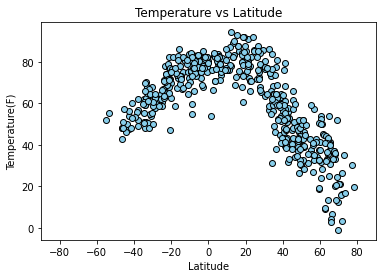

This chart calculates the relationship between a city's distance from the equator and its temperature.


In [7]:
plt.scatter(clean_df.lat, clean_df.Temp, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Temperature vs Latitude")
plt.xlim(-90, 90)
plt.savefig("Temperature vs Latitude.png")
plt.show()
print("This chart calculates the relationship between a city's distance from the equator and its temperature.")

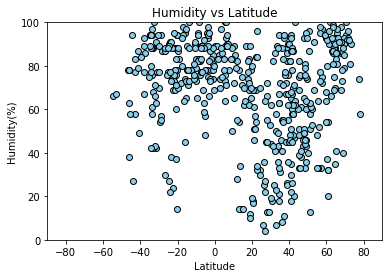

This chart calculates the relationship between a city's distance from the equator and its humidity.


In [8]:
plt.scatter(clean_df.lat, clean_df.Humidity, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Humidity vs Latitude")
plt.xlim(-90, 90)
plt.ylim(0, 100)
plt.savefig("Humidity vs Latitude.png")
plt.show()
print("This chart calculates the relationship between a city's distance from the equator and its humidity.")

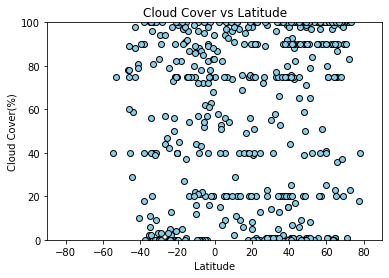

This chart calculates the relationship between a city's distance from the equator and its cloud cover.


In [9]:
plt.scatter(clean_df.lat, clean_df.Cloudiness, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover(%)")
plt.title("Cloud Cover vs Latitude")
plt.xlim(-90, 90)
plt.ylim(0, 100)
plt.savefig("Cloud Cover vs Latitude.png")
plt.show()
print("This chart calculates the relationship between a city's distance from the equator and its cloud cover.")

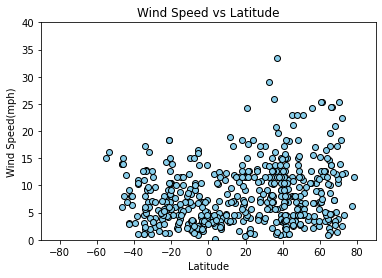

This chart calculates the relationship between a city's distance from the equator and its wind speed.


In [10]:
plt.scatter(clean_df.lat, clean_df.Wind_Speed, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Wind Speed vs Latitude")
plt.xlim(-90, 90)
plt.ylim(0, 40)
plt.savefig("Wind Speed vs Latitude.png")
plt.show()
print("This chart calculates the relationship between a city's distance from the equator and its wind speed.")

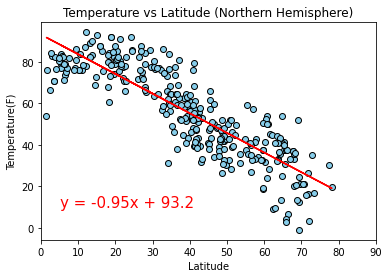

The linear regression demonstrates a negative relationship between temperature and latitude in the Northern Hemisphere. It is expected based on this model that it becomes colder as one travels north.


In [11]:
x_values = clean_df.lat.loc[clean_df.lat>=0]
y_values = clean_df.Temp.loc[clean_df.lat>=0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Temperature vs Latitude (Northern Hemisphere)")
plt.xlim(0, 90)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.savefig("Temperature vs Latitude NH.png")
plt.show()
print("The linear regression demonstrates a negative relationship between temperature and latitude in the Northern Hemisphere. \
It is expected based on this model that it becomes colder as one travels north.")

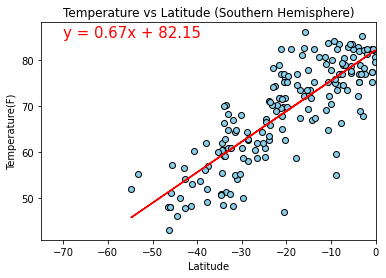

The linear regression demonstrates a positive relationship between temperature and latitude in the Southern Hemisphere. It is expected based on this model that it becomes colder as one travels south.


In [12]:
x_values = clean_df.lat.loc[clean_df.lat<0]
y_values = clean_df.Temp.loc[clean_df.lat<0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Temperature vs Latitude (Southern Hemisphere)")
plt.xlim(-75, 0)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-70, 85),fontsize=15,color="red")
plt.savefig("Temperature vs Latitude SH.png")
plt.show()
print("The linear regression demonstrates a positive relationship between temperature and latitude in the Southern Hemisphere. \
It is expected based on this model that it becomes colder as one travels south.")

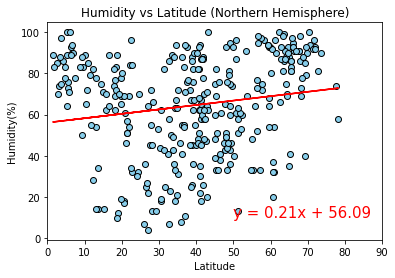

The linear regression demonstrates a positive relationship between humidity and latitude in the Northern Hemisphere. It is expected based on this model that it becomes more humid as one travels north.


In [13]:
x_values = clean_df.lat.loc[clean_df.lat>=0]
y_values = clean_df.Humidity.loc[clean_df.lat>=0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Humidity vs Latitude (Northern Hemisphere)")
plt.xlim(0, 90)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.savefig("Humidity vs Latitude NH.png")
plt.show()
print("The linear regression demonstrates a positive relationship between humidity and latitude in the Northern Hemisphere. \
It is expected based on this model that it becomes more humid as one travels north.")

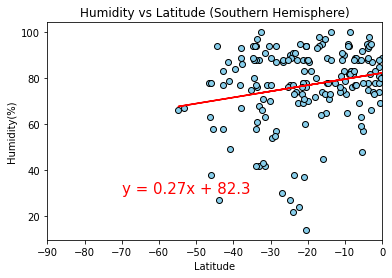

The linear regression demonstrates a negative relationship between humidity and latitude in the Southern Hemisphere. It is expected based on this model that it becomes more humid as one travels north.


In [14]:
x_values = clean_df.lat.loc[clean_df.lat<0]
y_values = clean_df.Humidity.loc[clean_df.lat<0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Humidity vs Latitude (Southern Hemisphere)")
plt.xlim(-90, 0)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-70, 30),fontsize=15,color="red")
plt.savefig("Humidity vs Latitude SH.png")
plt.show()
print("The linear regression demonstrates a negative relationship between humidity and latitude in the Southern Hemisphere. \
It is expected based on this model that it becomes more humid as one travels north.")

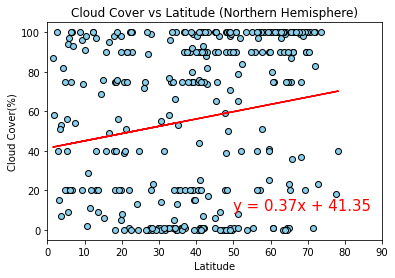

The linear regression demonstrates a positive relationship between cloud cover and latitude in the Northern Hemisphere. It is expected based on this model that it becomes more cloudy as one travels north.


In [15]:
x_values = clean_df.lat.loc[clean_df.lat>=0]
y_values = clean_df.Cloudiness.loc[clean_df.lat>=0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover(%)")
plt.title("Cloud Cover vs Latitude (Northern Hemisphere)")
plt.xlim(0, 90)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.savefig("Cloud Cover vs Latitude NH.png")
plt.show()
print("The linear regression demonstrates a positive relationship between cloud cover and latitude in the Northern Hemisphere. \
It is expected based on this model that it becomes more cloudy as one travels north.")

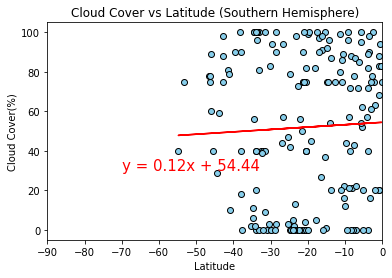

The linear regression demonstrates a positive relationship between cloud cover and latitude in the Southern Hemisphere. It is expected based on this model that it becomes more cloudy as one travels north.


In [16]:
x_values = clean_df.lat.loc[clean_df.lat<0]
y_values = clean_df.Cloudiness.loc[clean_df.lat<0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover(%)")
plt.title("Cloud Cover vs Latitude (Southern Hemisphere)")
plt.xlim(-90,0)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-70, 30),fontsize=15,color="red")
plt.savefig("Cloud Cover vs Latitude SH.png")
plt.show()
print("The linear regression demonstrates a positive relationship between cloud cover and latitude in the Southern Hemisphere. \
It is expected based on this model that it becomes more cloudy as one travels north.")

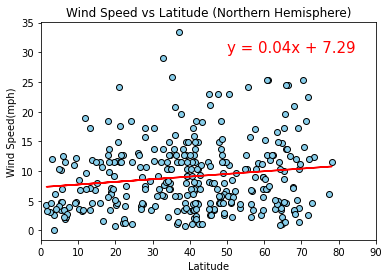

The linear regression demonstrates a positive relationship between wind speed and latitude in the Northern Hemisphere. It is expected based on this model that it becomes more windy as one travels north.


In [17]:
x_values = clean_df.lat.loc[clean_df.lat>=0]
y_values = clean_df.Wind_Speed.loc[clean_df.lat>=0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Wind Speed vs Latitude (Northern Hemisphere)")
plt.xlim(0, 90)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.savefig("Wind Speed vs Latitude NH.png")
plt.show()
print("The linear regression demonstrates a positive relationship between wind speed and latitude in the Northern Hemisphere. \
It is expected based on this model that it becomes more windy as one travels north.")

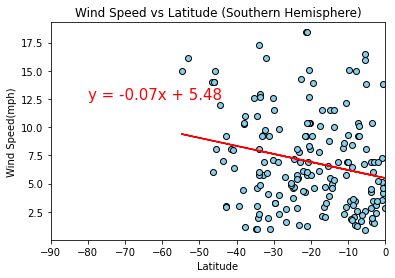

The linear regression demonstrates a negative relationship between wind speed and latitude in the Southern Hemisphere. It is expected based on this model that it becomes less windy as one travels north.


In [18]:
x_values = clean_df.lat.loc[clean_df.lat<0]
y_values = clean_df.Wind_Speed.loc[clean_df.lat<0]
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Wind Speed vs Latitude (Southern Hemisphere)")
plt.xlim(-90, 0)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,12.5),fontsize=15,color="red")
plt.savefig("Wind Speed vs Latitude SH.png")
plt.show()
print("The linear regression demonstrates a negative relationship between wind speed and latitude in the Southern Hemisphere. \
It is expected based on this model that it becomes less windy as one travels north.")